In [11]:
import sys
sys.path.append("..")


import cv2
import numpy as np
from glob import glob
from models import Yolov4
# Define density thresholds
HIGH_DENSITY_THRESHOLD = 20
MEDIUM_DENSITY_THRESHOLD = 10



In [12]:

import matplotlib.pyplot as plt


nms iou: 0.413 score: 0.3
all weights read
load from ../yolov4.weights
img shape:  (2000, 3000, 3)
1/1 [==============================] - 4s 4s/step
# of bboxes: 19


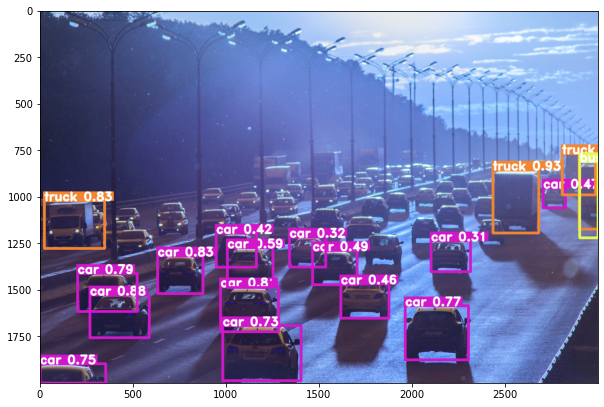

array([[[ 41,  58,  97],
        [ 43,  60,  99],
        [ 50,  66, 103],
        ...,
        [145, 185, 237],
        [145, 185, 237],
        [145, 185, 237]],

       [[ 42,  59,  98],
        [ 44,  61, 100],
        [ 53,  69, 106],
        ...,
        [145, 185, 237],
        [145, 185, 237],
        [145, 185, 237]],

       [[ 42,  57,  96],
        [ 42,  57,  96],
        [ 51,  67, 104],
        ...,
        [145, 185, 237],
        [145, 185, 237],
        [145, 185, 237]],

       ...,

       [[210,  23, 203],
        [210,  23, 203],
        [210,  23, 203],
        ...,
        [ 57,  58,  84],
        [ 52,  53,  79],
        [ 55,  56,  82]],

       [[210,  23, 203],
        [210,  23, 203],
        [210,  23, 203],
        ...,
        [ 36,  37,  63],
        [ 47,  48,  74],
        [ 59,  60,  86]],

       [[210,  23, 203],
        [210,  23, 203],
        [210,  23, 203],
        ...,
        [ 45,  46,  72],
        [ 51,  52,  78],
        [ 49,  50,  76]]

In [13]:

raw_img = cv2.imread('../img/traffic/hightraffic.jpg')

model = Yolov4(weight_path='../yolov4.weights',
               class_name_path='../class_names/coco_classes.txt')

output_img, detections = model.predict_img(raw_img, random_color=False, return_output=True)

output_img

In [14]:
print(detections[:5]) 

     x1    y1    x2    y2 class_name     score    w    h
0  2435   854  2681  1193      truck  0.928704  246  339
1   268  1526   587  1756        car  0.883465  319  230
2   632  1316   876  1519        car  0.833527  244  203
3    23  1019   347  1276      truck  0.830929  324  257
4   970  1482  1281  1724        car  0.811693  311  242


In [15]:

num_vehicles = sum(detections['class_name'].isin(['car', 'truck']))
num_vehicles

18

In [16]:


if num_vehicles >= HIGH_DENSITY_THRESHOLD:
    # color = (0, 0, 255)  
    label = 'High Density'
elif num_vehicles >= MEDIUM_DENSITY_THRESHOLD:
    # color = (0, 255, 255) 
    label = 'Medium Density'
else:
    # color = (0, 255, 0)  
    label = 'Low Density'


In [17]:

relevant_detections = detections[detections['class_name'].isin(['car', 'truck'])]

boxes = relevant_detections[['x1', 'y1', 'x2', 'y2']].values.tolist()


In [18]:

scale = 5
thickness = 10

(text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, scale, thickness)

text_x = (output_img.shape[1] - text_width) // 2
text_y = (output_img.shape[0] + text_height) // 2

cv2.rectangle(output_img, (text_x - 20, text_y + 20), (text_x + text_width + 20, text_y - text_height - 20), (0, 0, 0), -1)

cv2.putText(output_img, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, scale, (255, 255, 255), thickness)

output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)



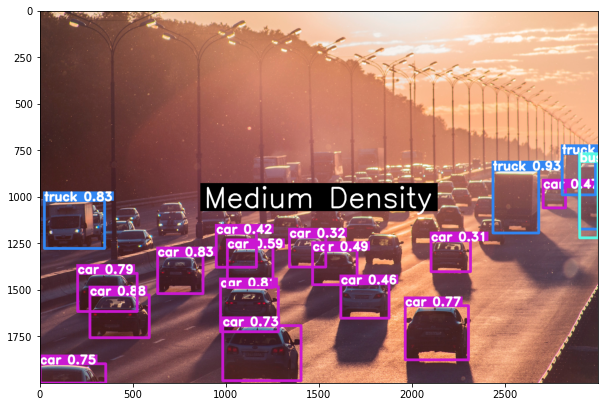

In [19]:

plt.figure(figsize=(10,10))
plt.imshow(output_img_rgb)
plt.show()